# Actividad 1: Comprendiendo los datos

Comenzamos importando las librerías necesarias:

In [1]:
import numpy as np
import librosa
import librosa.display as lbds
import matplotlib.pyplot as plt

Ahora cargamos el *dataset* que contiene las canciones. Notar que estamos trabajando en Google Colab (debido a la facilidad que da para trabajar con tensorflow) por lo que cargamos los datos desde una carpeta en Drive. Para cargar los datos desde el almacenamiento local, cambiar el path en la variable ```path_song```

In [2]:
# Lo siguiente es sólo para el trabajo con colab:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Escogemos el género Jazz, y la canción de nombre ```jazz.00017.wav```

In [3]:
# El siguiente PATH debe modificarse si se ejecuta en almacenamiento local:
PATH_SONG = '/content/gdrive/MyDrive/2022-1/Tarea 4 - IIC2613/jazz.00017.wav'

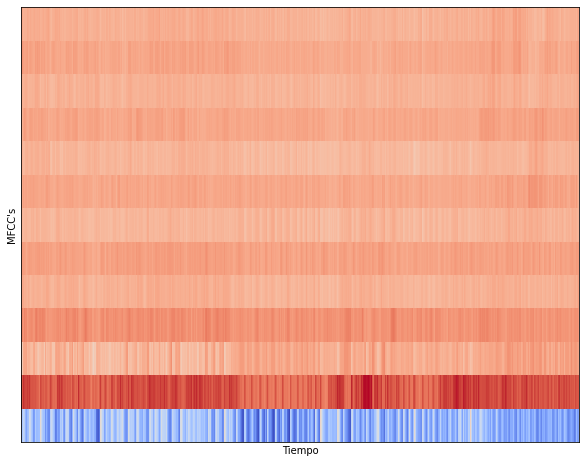

In [4]:
# Cargamos el archivo .wav con librosa:
sound_wave, sample_rate = librosa.load(PATH_SONG)

# Conseguimos los MFCC's con librosa:
mfccs = librosa.feature.mfcc(y=sound_wave, sr=sample_rate, n_mfcc=13)
# Para n_mfcc se escoge 13 porque así fue presentado en la cápsula, pero pudo escogerse cualquier valor
# entre 12 y 20, ya que son los recomendados según:
# https://www.researchgate.net/post/Why_we_take_only_12-13_MFCC_coefficients_in_feature_extraction

# Graficamos los coeficientes:
plt.figure(figsize=(10,8))
lbds.specshow(mfccs)
plt.xlabel("Tiempo")
plt.ylabel("MFCC's")
plt.show()

Ahora se responderá a la siguiente pregunta: **¿Qué son y para qué sirven los MFCC's?**

R: Los MFCC's, o *Mel Frequency Cepstral Coefficients* son coeficientes asociados a una transformación en la señal de audio. A grandes rasgos, estos coeficientes permiten "emular" como escucha el ser humano. Más específicamente, el ser humano tiene órganos que identifican frecuencias de los sonidos de una manera espléndida, pero no igual a la que vemos en un espectrograma de frecuencias. Para el ser humano distinguir frecuencias bajas es una tarea más o menos sencilla, sin embargo, en las frecuencias altas esta tarea es mucho más compleja, aún cuando en un espectrograma se puedan distinguir claramente las diferencias entre las frecuencias altas. Es por lo anterior que los coeficientes permiten "emular" cómo el ser humano escucha los sonidos, "añadiendo" estas dificultades en la distinción de frecuencias agudas. Todo esto se realiza mediante la re-escala de frecuencias Mel, cuyo objetivo es no-linealizar la relación entre frecuencias.

El objetivo de utilizar los MFCC's en lugar de algún otro método asociado es justamente representar de manera fidedigna la escucha humana. En el contexto de Machine Learning, siempre se busca que la máquina aprenda de acuerdo a lo que nos interese, y como en general buscamos distinguir sonidos que el ser humano escucha, debemos permitir que la máquina con datos parecidos a los que el ser humano escucharía.

**Si tuviéramos pocos audios para entrenar un modelo, ¿qué técnicas podrías usar para enriquecer el set de datos?**


Haciendo la analogía con el aumento de datos en imágenes, una buena decisión sería modificar los datos actuales de manera que se produzcan nuevos sonidos asociados al género en cuestión. Es por esta misma razón que la modificación tiene menos rango que la modificación realizada en imágenes, ya que si una canción ve modificada su velocidad por ejemplo, puede cambiar drásticamente de género. Por lo anterior, podría proponerse un cambio en las frecuencias de las canciones, así como el uso de filtros que permitan simular otros instrumentos pero manteniendo el género musical.

Como ejemplo de lo anterior, se puede elegir una canción y realizar las siguientes modificaciones:
1. Aumentar/Disminuir la frecuencia.
2. Utilizar filtros que modifiquen el sonido de los instrumentos.
3. Aumentar/Disminuir la ganancia, dependiendo del género (por ejemplo, en el metal sería interesante aumentar la ganancia).

De esta manera, a partir de un solo dato se podrían obtener como mínimo 3 datos extra. Extrapolando esto generaría un aumento lineal en el número de datos en función del número de modificaciones a realizar a cada canción.

# Actividad 2: Optimizador Adam

El optimizador Adam surge de la combinación de dos variaciones de SGD: SGD con Momentum y RMSprop.

En primer lugar, SGD con Momentum realiza una aproximación a partir de un promedio ponderado de los pesos y el bias a estimar, por lo que evita que el SGD original tenga movimientos estocásticos alejados del óptimo y en consecuencia llega a una solución más rápidamente. Cabe destacar que como se realiza una aproximación por promedio de los parámetros, para cada peso se obtiene una ponderación distinta, por lo que cambia el *learning rate* en cada parámetro.

En segundo lugar, RMSprop es similar al método SGD con Momentum, pero utiliza la varianza descentralizada en lugar del promedio ponderado, por lo que su aproximación llega aún más rápido al óptimo que con SGD con Momentum. Al utilizar la varianza, disminuye el ruido en las aproximaciones, por lo que es de mucha utilidad en problemas no-convexos.

Ahora bien, el optimizador Adam es juntar los dos algoritmos mencionados anteriormente, es decir, utiliza el promedio ponderado y la varianza descentralizada para el cálculo de los pesos y el bias. Por lo anterior, Adam tiene la unión de las ventajas de los dos modelos anteriores. De esta manera, Adam actualiza el *learning rate* para cada parámetro (aumentando así, su velocidad de convergencia) y también maneja de mejor manera los problemas no convexos y ruidosos (mejorando así también la velocidad de convergencia).

En conclusión, lo que diferencia a SGD de Adam es que SGD mantiene el *learning rate* constante durante todo el algoritmo, en cambio Adam lo actualiza dependiendo del valor del parámetro, es decir, Adam es un optimizador adaptativo. Además, con la disminución de ruido permite que la convergencia estocástica dada por SGD sea más directa y óptima en la métrica trivial de la dimensión del espacio (por ejemplo, L^2 en R^p).

En el contexto del problema planteado, lo que más ventaja tiene respecto a SGD es el trabajo con datos ruidosos. En particular, el sonido es de por sí no-estacionario, lo que quiere decir que depende fuertemente del tiempo y sus cambios son abruptos aún en pequeños intervalos. Lo anterior demuestra una desventaja por parte de SGD, ya que esto es una forma de dato ruidoso que no permite llegar al óptimo de manera eficiente, en cambio Adam al trabajar con la varianza permite esta disminución de ruido, luego su trabajo con problemas no-estacionarios es mucho más directo y sencillo que lo que haría SGD. Por esto, utilizar Adam permitiría en teoría llegar al óptimo de manera más eficiente y rápida.

# Actividad 3: Red Neuronal Densa

Comenzamos importando las librerías necesarias

In [5]:
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import json

Ahora cargamos el dataset entregado para la tarea:

In [6]:
def load_data(path):
  """
  Carga los datos del archivo .json
  """
  with open(path, 'r') as file:
    data = json.load(file)
    
  # Separamos en los datos que nos interesan:
  mapping = np.array(data['mapping'])
  mfccs = np.array(data['mfcc'])       # Estos son los inputs
  labels = np.array(data['labels'])    # Estos son los labels del output

  return mapping, mfccs, labels

# Seteamos el path y cargamos los datos separados:
PATH_JSON = '/content/gdrive/MyDrive/2022-1/Tarea 4 - IIC2613/mfcc_data.json'
mapping, mfccs, labels = load_data(PATH_JSON)

Visualizamos las dimensiones de los sets obtenidos anteriormente:

In [7]:
print(f"El set de labels tiene shape: {labels.shape}")
print(f"El set de inputs tiene shape: {mfccs.shape}")

El set de labels tiene shape: (10000,)
El set de inputs tiene shape: (10000, 130, 13)


A continuación separamos entre los datos de entrenamiento, test y validación. Las proporciones utilizadas serán 0.6, 0.3 y 0.1 respectivamente:

In [29]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

# Set de entrenamiento:
X_train, X_test, y_train, y_test = train_test_split(mfccs, labels, test_size=0.4, random_state=10)

# Set de test y validación respectivamente:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=10)

In [9]:
print(f"Las dimensiones del set de entrenamiento: {X_train.shape}")
print(f"Las dimensiones del set de test: {X_test.shape}")
print(f"Las dimensiones del set de validación: {X_val.shape}")

Las dimensiones del set de entrenamiento: (6000, 130, 13)
Las dimensiones del set de test: (3000, 130, 13)
Las dimensiones del set de validación: (1000, 130, 13)


Ahora podemos formar la estructura de la red:

In [10]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

model = keras.Sequential([
  # Comenzamos con la capa de entrada:
  keras.layers.Flatten(input_shape=(mfccs.shape[1], mfccs.shape[2])),

  # Añadimos un total de 4 capas ocultas:
  # Primera capa oculta de 512 neuronas:
  keras.layers.Dense(1024, activation='relu'),

  # Segunda capa oculta de 256 neuronas:
  keras.layers.Dense(512, activation='relu'),

  # Tercera capa oculta de 128 neuronas:
  keras.layers.Dense(128, activation='relu'),

  # Cuarta capa oculta de 64 neuronas:
  keras.layers.Dense(64, activation='relu'),

  # Añadimos finalmente la capa de output:
  keras.layers.Dense(10, activation='softmax')
])

Respecto al código anterior pueden notarse unas cuantas situaciones:
1. Se escogió una distribución descendiente en el número de neuronas de las capas ocultas.
2. La capa de salida (o output) contiene 10 neuronas, ya que debe clasificar un total de 10 géneros.
3. Cada capa oculta utiliza la función de activación ReLU, ya que permite la activación de solamente algunas neuronas, produciendo eficiencia en la computación.
4. La capa de salida (o output) utiliza la función de activación Softmax, ya que ésta genera un output con distribución de probabilidades para cada neurona según [Wikipedia](https://en.wikipedia.org/wiki/Softmax_function)

Finalmente, podemos compilar el modelo creado, utilizando el optimizador Adam de acuerdo al enunciado:

In [11]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

# Definimos el optimizador según el learning rate que se requiera:
learning_rate = 0.0001
optimizador = keras.optimizers.Adam(learning_rate=learning_rate)

# Compilamos el modelo creado:
model.compile(optimizer=optimizador,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Respecto al código anterior puede notarse que se utilizó la función de pérdida *Sparse Categorical Cross Entropy*, ya que el output es presentado en forma numérica entera, y la eficiencia en cómputo es mayor utilizando esta función de pérdida, de acuerdo a [la comunidad](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

In [12]:
# Imprimimos datos de la compilación:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 1024)              1731584   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,330,954
Trainable params: 2,330,954
Non-

Ahora que el modelo ya está compilado y listo, puede ser entrenado:

In [13]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

epocas = 60  # Definimos el número de épocas
batch = 32  # Definimos el tamaño del batch, es recomendable que sea entre 16 y 128.

# Entrenamos el modelo:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch, epochs=epocas)

Epoch 1/60
188/188 [==============================] - 2s 5ms/step - loss: 4.7331 - accuracy: 0.3272 - val_loss: 2.4078 - val_accuracy: 0.3610
Epoch 2/60
188/188 [==============================] - 1s 4ms/step - loss: 1.8356 - accuracy: 0.4513 - val_loss: 1.9198 - val_accuracy: 0.4257
Epoch 3/60
188/188 [==============================] - 1s 5ms/step - loss: 1.4116 - accuracy: 0.5388 - val_loss: 1.8445 - val_accuracy: 0.4393
Epoch 4/60
188/188 [==============================] - 1s 5ms/step - loss: 1.2098 - accuracy: 0.5982 - val_loss: 1.7219 - val_accuracy: 0.4773
Epoch 5/60
188/188 [==============================] - 1s 4ms/step - loss: 1.0184 - accuracy: 0.6525 - val_loss: 1.8167 - val_accuracy: 0.4697
Epoch 6/60
188/188 [==============================] - 1s 5ms/step - loss: 0.8876 - accuracy: 0.6993 - val_loss: 1.6480 - val_accuracy: 0.4980
Epoch 7/60
188/188 [==============================] - 1s 4ms/step - loss: 0.7916 - accuracy: 0.7353 - val_loss: 1.8447 - val_accuracy: 0.4813
Epoch 

Graficamos el accuracy y la función de pérdida respecto a las épocas:
0.6207
0.6240
0.6367

In [14]:
# Código obtenido directamente desde la Ayudantía 10 - Redes Neuronales, IIC2613 2022-1

def plot_history(history):
    """
    Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

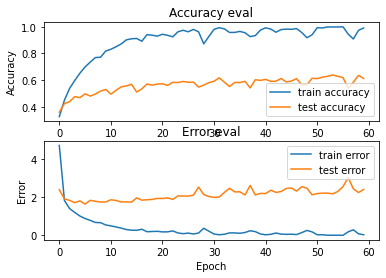

In [15]:
plot_history(history)

Puede notarse que en el set de entrenamiento el accuracy aumenta con el número de épocas, y el error disminuye de la misma manera. Sin embargo, en el set de test se puede apreciar que que el accuracy no aumenta prácticamente nada al aumentar el número de épocas, al igual que el error no dismiuye bajo el mismo parámetro. Lo anterior indica una suerte de *overfitting*, ya que se tienen muy buenos resultados en el entrenamiento pero no tan buenos en el set de test.

A continuación se evaluará el accuracy del set de test:

In [31]:
loss, acc = model.evaluate(X_test,
                           y_test,
                           batch_size=batch,
                           verbose=0)
print(f"Accuracy para el set de test: {(100.0 * acc)}%")
print(f"Valor de la función de pérdida para el set de test: {loss}")

Accuracy para el set de test: 61.33333444595337%
Valor de la función de pérdida para el set de test: 2.415898084640503


Puede notarse que el accuracy es cercano a 60% para el set de test, sin embargo es muy alejado del 95% obtenido en el set de entrenamiento, por lo que todo indica que estamos frente a *overfitting*. Además, puede notarse que la función de pérdida para el set de test es mayor a 2.5, lo que quiere decir que no se obtuvo un valor muy cercano al óptimo (0).

# Actividad 4: Introducción a las CNN's

Las redes neuronales convolucionales consisten en aplicar una transformación lineal (en palabras sencillas, filtros) a los datos, obteniendo un set de datos modificados que puede ser de utilidad al momento de querer detectar ciertos rasgos o características del set de datos en cuestión. En resumen, utilizan una transformación que permita resaltar aquellas características de los datos que más se interesen, y dejar de lado las características que no interesen demasiado al momento de crear la red neuronal. Esto se realiza en cada capa, es decir, en cada capa se puede realizar una convolución (o usar un filtro) que permita entregar a la capa siguiente una modificación deseada. La utilidad de estas redes para el trabajo de audio consiste principalmente en distinguir ciertas frecuencias y sonidos que remarcan los distintos géneros musicales, e intentar evitar de esta manera los ruidos y todas aquellas frecuencias que el ser humano no podría distinguir, pero el computador sí. De esta manera, el entrenamiento se asemejaría a lo que un humano percibe en los sonidos y no lo que la máquina calcula de ellos.

Las ventajas radican justamente en lo mencionado anteriormente, a continuación se puntúan algunas:
1. Permite disminuir ruidos y frecuencias no distinguibles por el ser humano.
2. Remarca ciertos patrones en los distintos géneros musicales, facilitando la predicción.

# Actividad 5: Creando una CNN clasificadora:

A diferencia del código de la actividad 3, en este caso debemos notar que las convoluciones de `keras` son aplicables a imágenes, que corresponden a un array de 3 dimensiones. Sin embargo, en la actividad 3 notamos que solamente usábamos dos dimensiones para la estructura de la red, es por ello que a continuación se modificará el set de entrenamiento, test y validación añadiendo una dimensión extra, que indicaría si la "imagen" (porque debemos trabajar los datos como si fuesen imágenes) es RGB, grey-scale, u otro canal:

In [17]:
# Añadimos una nueva dimensión con un sólo valor:
X_train_CNN = X_train[..., np.newaxis]
X_test_CNN = X_test[..., np.newaxis]
X_val_CNN = X_val[..., np.newaxis]

In [18]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

model_cnn = keras.Sequential([
  # Añadimos la capa convolucional, con 40 filtros utilizados en la capa, además del
  # pooling:
  # Notar que es la capa de input!
  keras.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
  keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),  # Utilizado para aumentar la velocidad de ejecución en el algoritmo

  # Añadimos la segunda capa convolucional igual a la capa anterior, con 32 filtros:
  keras.layers.Conv2D(32, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),  # Utilizado para aumentar la velocidad de ejecución en el algoritmo

  # Añadimos la tercera capa convolucional, con 32 filtros:
  keras.layers.Conv2D(32, (2, 2), activation='relu'),
  keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),  # Utilizado para aumentar la velocidad de ejecución en el algoritmo

  # Ahora realizamos el flatten necesario para pasar estas capas a las capas densas, al igual que en la actividad 3:
  keras.layers.Flatten(),

  # Añadimos las capas densas igual que en la actividad 3:
  # Primera capa oculta de 512 neuronas:
  keras.layers.Dense(1024, activation='relu'),

  # Segunda capa oculta de 256 neuronas:
  keras.layers.Dense(512, activation='relu'),

  # Tercera capa oculta de 128 neuronas:
  keras.layers.Dense(128, activation='relu'),

  # Cuarta capa oculta de 64 neuronas:
  keras.layers.Dense(64, activation='relu'),

  # Añadimos finalmente la capa de output:
  keras.layers.Dense(10, activation='softmax')
])

Ahora compilamos y entrenamos el modelo:

In [19]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

# Compilamos el modelo creado:
model_cnn.compile(optimizer=optimizador,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [20]:
# Comenzamos seteando una semilla según enunciado:
np.random.seed(19640960)

# Entrenamos el modelo:
history_CNN = model_cnn.fit(X_train_CNN, y_train, validation_data=(X_test_CNN, y_test), batch_size=batch, epochs=epocas)

Epoch 1/60
188/188 [==============================] - 4s 8ms/step - loss: 1.4044 - accuracy: 0.4900 - val_loss: 1.4038 - val_accuracy: 0.4903
Epoch 2/60
188/188 [==============================] - 1s 6ms/step - loss: 0.9261 - accuracy: 0.6712 - val_loss: 1.0025 - val_accuracy: 0.6367
Epoch 3/60
188/188 [==============================] - 1s 6ms/step - loss: 0.7237 - accuracy: 0.7507 - val_loss: 0.9427 - val_accuracy: 0.6577
Epoch 4/60
188/188 [==============================] - 1s 6ms/step - loss: 0.5742 - accuracy: 0.8053 - val_loss: 0.9395 - val_accuracy: 0.6733
Epoch 5/60
188/188 [==============================] - 1s 6ms/step - loss: 0.4707 - accuracy: 0.8442 - val_loss: 0.9499 - val_accuracy: 0.6723
Epoch 6/60
188/188 [==============================] - 1s 6ms/step - loss: 0.3474 - accuracy: 0.8930 - val_loss: 0.8636 - val_accuracy: 0.7060
Epoch 7/60
188/188 [==============================] - 1s 6ms/step - loss: 0.2822 - accuracy: 0.9132 - val_loss: 0.8829 - val_accuracy: 0.7017
Epoch 

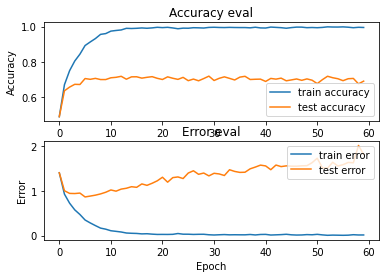

In [21]:
plot_history(history_CNN)

Podemos notar que al igual que en la actividad 3, el accuracy para el set de entrenamiento y test es distinto. En particular también podemos estar en presencia de *overfitting*.

In [22]:
loss_cnn, acc_cnn = model_cnn.evaluate(X_test_CNN,
                                       y_test,
                                       batch_size=batch,
                                       verbose=0)
print(f"Accuracy para el set de test: {(100.0 * acc_cnn)}%")
print(f"Valor de la función de pérdida para el set de test: {loss_cnn}")

Accuracy para el set de test: 69.13333535194397%
Valor de la función de pérdida para el set de test: 1.8145235776901245


Sin embargo, puede notarse que el accuracy del set de test a pesar de ser bajo en comparación al set de entrenamiento, tiene un valor mucho mayor al utilizar la convolución, es decir, predice mucho mejor los valores en comparación a la red sin convolución! Lo mismo sucede en el caos de la función de pérdida, que presenta una disminución respecto a la red sin convolución, pero aún sin llegar al valor óptimo.

# Actividad 6: Comparación de modelos

En primer lugar se pueden comparar los modelos según los valores obtenidos para el accuracy. Es notorio que usar una red convolucional como la utilizada en la actividad 5 genera un accuracy mayor al generado por la red neuronal común de la actividad 3. A pesar de ello, ambas redes dan indicios de *overfitting*, ya que por mucho que aumente su accuracy en el set de entrenamiento, en el set de test se caen fácilmente y obtienen un accuracy muy bajo en comparación al set de entrenamiento. Ahora bien, esta mejora se da principalmente por la utilización de los filtros en la red convolucional, que permite un mejor entendimiento del input y genera mayores diferencias entre los géneros musicales (en realidad, resalta las diferencias).

A continuación se graficará la matriz de confusión para ambas redes:

In [32]:
# Para la red sin convolución, obtenemos la predicción según el que mayor probabilidad de ocurrencia tenga:
y_predicted = np.argmax(model.predict(X_test), axis=1)

# Para la red convolucional, realizamos el mismo procedimiento pero con el set de test que se utiliza para ello:
y_predicted_cnn = np.argmax(model_cnn.predict(X_test_CNN), axis=1)

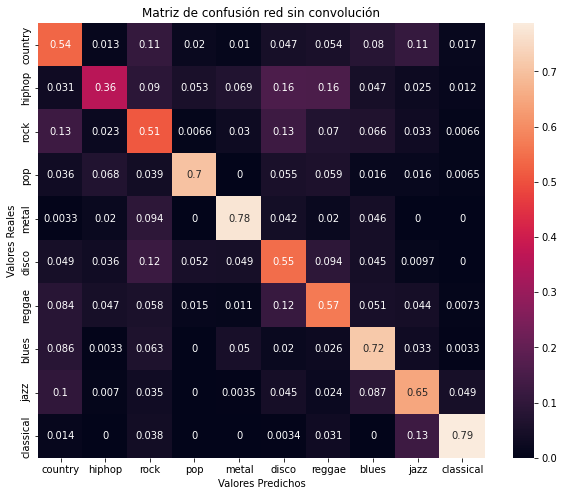

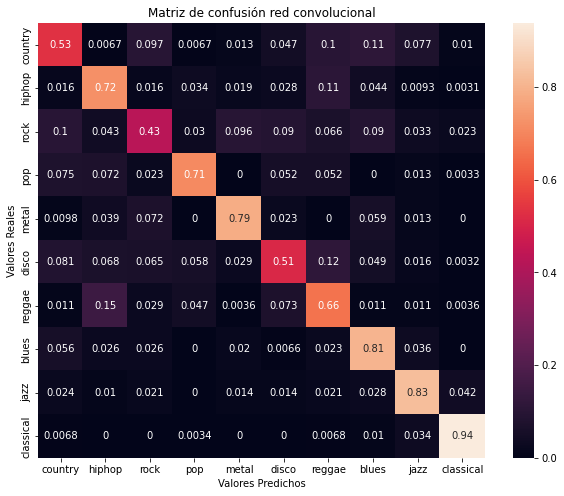

In [33]:
# Ahora calculamos la matriz de confusión con Scikit Learn, y la ploteamos:
# Código basado en https://pythonguides.com/scikit-learn-confusion-matrix/

from sklearn.metrics import confusion_matrix
import seaborn as sb

# Matriz de confusión para la red sin convolución
confusion_matrix_normal = confusion_matrix(y_test, y_predicted, normalize='true')

# Matriz de confusión para la red convolucional
confusion_matrix_cnn = confusion_matrix(y_test, y_predicted_cnn, normalize='true')

# DataFrames para ambas matrices:
dfs = [(pd.DataFrame(confusion_matrix_normal, index = mapping, columns = mapping), 'Matriz de confusión red sin convolución'),
       (pd.DataFrame(confusion_matrix_cnn, index = mapping, columns = mapping), 'Matriz de confusión red convolucional')]

for df_cm, title in dfs:
  plt.figure(figsize=(10,8))
  sb.heatmap(df_cm, annot=True)
  plt.title(title)
  plt.ylabel('Valores Reales')
  plt.xlabel('Valores Predichos')
  plt.show()

Puede notarse que la clase que más confunden a la red neuronal sin convolución es el hiphop. Esto puede deberse a los cambios de ritmo constante que tiene este género entre canciones, ya que puede tener una velocidad alta, lenta o normal dependiendo de la canción, lo que podría generar confusiones en la red.

Para el caso de la red convolucional, puede notarse que la red que más confunde es el rock, y, en cambio, el hiphop está bien manejado. Esto puede deberse a los filtros utilizados en la convolución, principalmente puede notarse esto por el buen manejo con el hiphop, lo que indicaría una mayor concentración de la red en el ritmo de una canción. Como el rock, por lo general, mantiene su ritmo constante, para esta red que es más polivalente le es difícil distinguirlo, ya que podría ser cualquier ritmo el que se utilice en una canción, pero en el rock es el mismo.

Puede notarse además que la red convolucional tiene peores predicciones en disco y country que la red sin convolución. Esta peora es pequeña, por lo que podría deberse a un hecho de la semilla y la aleatoriedad de la red.

# Actividad 7: Probando con audios propios

In [35]:
# Para instalar pydub, descomenta:
# !pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Función que recibe un archivo `.wav` y entrega un diccionario con los labels y MFCCs de cada segmento

In [36]:
from pydub import AudioSegment
import librosa
import math
import json

def get_mfccs(file_path, label, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """Extrae los MFCCs de los primeros 30 segundos de una canción.
        :param file_path (str): Path del archivo
        :param label (int): Label
        :param num_mfcc (int): Número de los coeficientes a extraer
        :param n_fft (int): Intervalo en el que se realiza FFT.
        :param hop_length (int): Sliding window para FFT.
        :param: num_segments (int): Número de segementos en los que se dividirá la cación.
        :return:
        :param data: data[labels]: label de los segmentos
                     data[mfcc]: mfcc de cada segmento. Tamaño: (10, 130, 13)
    """

    # se seleccionan los primeros 30 segundos de la canción
    audio_file = AudioSegment.from_file(file_path)
    if len(audio_file) < 30000:
      print("Archivo dura menos de 30 segundos.")
      return None

    # se guardan los primeros 30 segundos en el archivo audio_part.wav
    audio_part = audio_file[: 30000]
    audio_part.export("audio_part.wav")

    # se definen variables
    sample_rate = 22050
    track_duration = 30
    samples_per_track = sample_rate * track_duration

    data = {
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(samples_per_track / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # se carga el archivo de audio modificado
    signal, sample_rate = librosa.load("audio_part.wav", sr=sample_rate)

    # se procesan los segmentos del archivo
    for d in range(num_segments):

      # se calcula el inicio y final de cada segmento
      start = samples_per_segment * d
      finish = start + samples_per_segment

      # se extraen los mfcc
      mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
      mfcc = mfcc.T

      # se guardan los mfcc si tienen el mismo tamaño que el esperado
      if len(mfcc) == num_mfcc_vectors_per_segment:
        data["mfcc"].append(mfcc.tolist())
        data["labels"].append(label)

    return data

Seteamos el path a la canción escogida. En este caso, la canción escogida es **Through the fire and flames** del famosísimo grupo **Dragonforce**. Es un temazo. Se puede encontrar la canción en YouTube, en el siguiente [link](https://www.youtube.com/watch?v=ntG_EEfpasM&ab_channel=Dragonforce-Topic). Esta canción es del género **metal**.

In [37]:
PATH_METAL = '/content/gdrive/MyDrive/2022-1/Tarea 4 - IIC2613/Through The Fire And Flames.wav'

Obtenemos los MFCC's con el código adjunto entregado:

In [44]:
dragonforce = get_mfccs(PATH_METAL, 4)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [50]:
# Separamos entre labels y MFCCs:
mfcc_dragonforce = np.array(dragonforce['mfcc'])  # Se utiliza numpy array para seguir en líneacon lo trabajado anteriormente.
mfcc_dragonforce = mfcc_dragonforce[..., np.newaxis]  # Se le añade la dimensión extra dado que trabajaremos con la red convolucional
labels_dragonforce = dragonforce['labels']

Ahora predecimos con la red convolucional:

In [55]:
# La siguiente es la predicción hecha por el modelo convolucional:
dragonforce_predicted = np.argmax(model_cnn.predict(mfcc_dragonforce), axis=1)

In [58]:
# Printeamos los resultados según los que tengan mayor probabilidad de ocurrencia:
segundos = [0,3,6,9,12,15,18,21,24,27,30]
for i, num in enumerate(list(dragonforce_predicted)):
  print(f"Los segundos {segundos[i]}-{segundos[i+1]} el algoritmo los reconoce como {mapping[int(num)]}")

Los segundos 0-3 el algoritmo los reconoce como hiphop
Los segundos 3-6 el algoritmo los reconoce como rock
Los segundos 6-9 el algoritmo los reconoce como hiphop
Los segundos 9-12 el algoritmo los reconoce como rock
Los segundos 12-15 el algoritmo los reconoce como disco
Los segundos 15-18 el algoritmo los reconoce como metal
Los segundos 18-21 el algoritmo los reconoce como hiphop
Los segundos 21-24 el algoritmo los reconoce como metal
Los segundos 24-27 el algoritmo los reconoce como metal
Los segundos 27-30 el algoritmo los reconoce como metal


Puede notarse que el algoritmo reconoce como el género correcto a la canción cuanto más avanzada está en la reproducción. Esto es normal en esta canción en particular dado que los primeros segundos corresponden a un arreglo de guitarra y la batería no es tan brusca. Ahora bien, como en los ultimos segundos en general se reconoce como Metal, puede decirse que el reconocimiento por la red convolucional está correcto, ya que si se escuchara toda la canción se llegaría justamente a que la canción corresponde al género metal.